### Given a topic research the latest news

In [32]:
from dotenv import load_dotenv

load_dotenv()

True

In [45]:
from PIL import Image
import numpy as np
import os
from skimage.color import rgb2gray
from skimage.feature import ORB
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

In [46]:
def find_regions_of_interest(image_path, box1, box2):
    # Open the image file
    img = Image.open(image_path)

    # Convert the image to grayscale
    img_gray = rgb2gray(np.array(img))

    # Get image dimensions
    img_height, img_width = img_gray.shape

    # Initialize ORB detector
    orb = ORB(n_keypoints=200)

    # Detect keypoints in the image
    orb.detect_and_extract(img_gray)

    # Extract coordinates of detected keypoints
    keypoints = orb.keypoints

    # Initialize an empty array to count keypoints
    keypoint_counts_box1 = np.zeros((img_height - box1 + 1, img_width - box1 + 1))
    keypoint_counts_box2 = np.zeros((img_height - box2 + 1, img_width - box2 + 1))

    # Count keypoints in each window
    for y, x in keypoints:
        for i in range(max(0, int(y) - box1 + 1), min(int(y) + 1, img_height - box1 + 1)):
            for j in range(max(0, int(x) - box1 + 1), min(int(x) + 1, img_width - box1 + 1)):
                keypoint_counts_box1[i, j] += 1

        for i in range(max(0, int(y) - box2 + 1), min(int(y) + 1, img_height - box2 + 1)):
            for j in range(max(0, int(x) - box2 + 1), min(int(x) + 1, img_width - box2 + 1)):
                keypoint_counts_box2[i, j] += 1

    # Find the window with the highest concentration of keypoints
    max_keypoints_y_box1, max_keypoints_x_box1 = np.unravel_index(keypoint_counts_box1.argmax(), keypoint_counts_box1.shape)

    # Calculate the window's pixel coordinates
    window_top_box1 = max_keypoints_y_box1
    window_left_box1 = max_keypoints_x_box1
    window_bottom_box1 = max_keypoints_y_box1 + box1
    window_right_box1 = max_keypoints_x_box1 + box1

    # Remove the overlapping region in the keypoint_counts_box2
    keypoint_counts_box2[max(0, window_top_box1 - box2):min(img_height - box2 + 1, window_bottom_box1),
                         max(0, window_left_box1 - box2):min(img_width - box2 + 1, window_right_box1)] = 0
    
    # Find the window with the highest concentration of keypoints in the updated keypoint_counts_box2
    max_keypoints_y_box2, max_keypoints_x_box2 = np.unravel_index(keypoint_counts_box2.argmax(), keypoint_counts_box2.shape)

    # Calculate the window's pixel coordinates
    window_top_box2 = max_keypoints_y_box2
    window_left_box2 = max_keypoints_x_box2
    window_bottom_box2 = max_keypoints_y_box2 + box2
    window_right_box2 = max_keypoints_x_box2 + box2

    # Calculate the center points of the regions
    center_box1 = ((window_left_box1 + window_right_box1) // 2, (window_top_box1 + window_bottom_box1) // 2)
    center_box2 = ((window_left_box2 + window_right_box2) // 2, (window_top_box2 + window_bottom_box2) // 2)

    return center_box1, center_box2

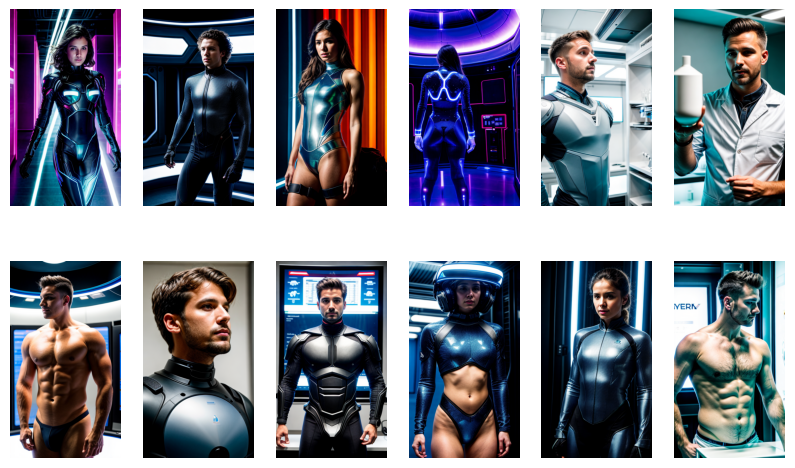

In [190]:
# directory containing your images
image_dir = './data/testosterone/'

# get list of all image filenames
image_filenames = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# load all images
images = [mpimg.imread(os.path.join(image_dir, f)) for f in image_filenames]

# create a grid of images
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('off')

plt.show()

In [191]:
image_filenames

['scene_1_2.png',
 'scene_1_7.png',
 'scene_1_1.png',
 'scene_1_8.png',
 'scene_2_5.png',
 'scene_2_1.png',
 'scene_2_6.png',
 'scene_2_4.png',
 'scene_2_8.png',
 'scene_1_5.png',
 'scene_1_3.png',
 'scene_2_3.png',
 'scene_2_2.png',
 'scene_1_6.png',
 'scene_1_4.png',
 'scene_2_7.png']

In [192]:
# Test images are not upscaled so boxes are smaller
box1 = 50
box2 = 300
image_pois = []

In [193]:
# Collect points of interest
for i, fn in enumerate(image_filenames):
    image_path = f"{image_dir}{fn}"

    center_box1, center_box2 = find_regions_of_interest(image_path, box1, box2)
    image_pois.append([center_box1, center_box2])
    
image_pois

[[(315, 223), (231, 398)],
 [(117, 624), (213, 183)],
 [(178, 145), (162, 320)],
 [(231, 478), (192, 294)],
 [(188, 418), (180, 208)],
 [(338, 176), (181, 532)],
 [(170, 36), (209, 211)],
 [(117, 244), (193, 475)],
 [(349, 702), (221, 402)],
 [(134, 198), (174, 479)],
 [(101, 476), (276, 389)],
 [(51, 162), (226, 156)],
 [(261, 487), (169, 311)],
 [(61, 36), (219, 337)],
 [(130, 153), (228, 589)],
 [(55, 129), (230, 150)]]

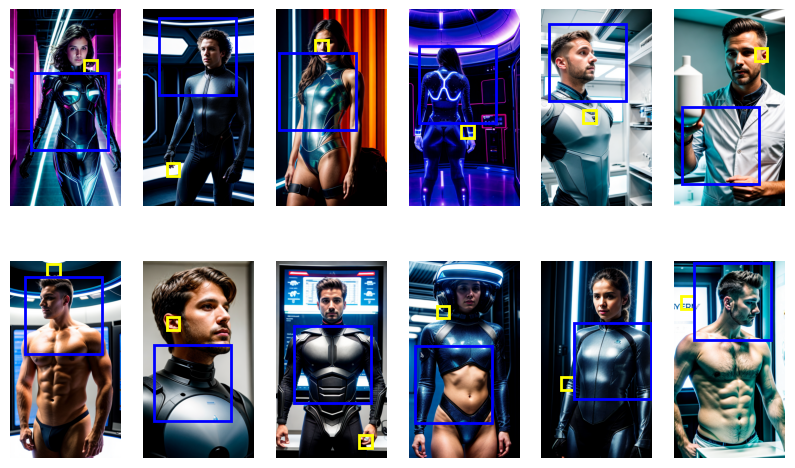

In [194]:
# load all images
#images = [mpimg.imread(os.path.join(image_dir, f)) for f in image_filenames]

# create a grid of images
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    # Calculate the top left and bottom right corners of the boxes
    top_left_box1 = (image_pois[i][0][0] - box1 // 2, image_pois[i][0][1] - box1 // 2)
    bottom_right_box1 = (image_pois[i][0][0] + box1 // 2, image_pois[i][0][1] + box1 // 2)

    top_left_box2 = (image_pois[i][1][0] - box2 // 2, image_pois[i][1][1] - box2 // 2)
    bottom_right_box2 = (image_pois[i][1][0] + box2 // 2, image_pois[i][1][1] + box2 // 2)

    # Draw rectangle for box1
    rect_box1 = plt.Rectangle(top_left_box1, box1, box1, fill=False, edgecolor='yellow', linewidth=2)
    ax.add_patch(rect_box1)

    # Draw rectangle for box2
    rect_box2 = plt.Rectangle(top_left_box2, box2, box2, fill=False, edgecolor='blue', linewidth=2)
    ax.add_patch(rect_box2)
    
    ax.imshow(images[i])
    ax.axis('off')

plt.show()

In [198]:
def generate_aicp_ffmpeg_command(input_image_path, start_coordinates, end_coordinates, zoom_factor, output_video_path, duration=3, fps=60):
    """
    This function generates an ffmpeg command to create a video with camera movement from point A to point B.
    
    Parameters:
    input_image_path (str): The path to the input image.
    start_coordinates (tuple): The starting coordinates (x, y).
    end_coordinates (tuple): The ending coordinates (x, y).
    zoom_factor (float): The zoom factor. Positive values zoom in, negative values zoom out.
    duration (int): The duration of the video in seconds.
    fps (int): The frames per second of the output video.
    output_video_path (str): The path to the output video.

    Returns:
    str: The ffmpeg command.
    """
    
    # get the resolution of the input image
    with Image.open(input_image_path) as img:
        width, height = img.size
    
    # extract start and end coordinates
    start_x, start_y = start_coordinates
    end_x, end_y = end_coordinates
    
    # calculate x and y movements and zoom changes per frame
    x_movement = (end_x - start_x) / (duration * fps)  
    y_movement = (end_y - start_y) / (duration * fps)  
    zoom_change = zoom_factor / (duration * fps)  
    
    command = (
        f"ffmpeg -loop 1 -i {input_image_path} -vf "
        f"\"zoompan=z='min(zoom+{zoom_factor},1.1)':x='x-{x_movement}':y='y-{y_movement}':d={duration*fps}\" "
        f"-c:v libx264 -r {fps} -s {width}x{height} -pix_fmt yuv420p -t {duration} {output_video_path}"
    )
    
    return command

In [199]:
# Collect points of interest
for i, fn in enumerate(image_filenames):
    image_path = f"{image_dir}{fn}"
    
    cmd = generate_aicp_ffmpeg_command(image_path, image_pois[i][0], image_pois[i][1], 0.0030, f"./temp/{i}.mp4")
    #print(cmd)
    os.system(cmd)



ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

[swscaler @ 0x5591f62c4980] Warning: data is not aligned! This can lead to a speed lossed=   0x    
frame=  180 fps=124 q=-1.0 Lsize=     151kB time=00:00:02.95 bitrate= 419.7kbits/s dup=105 drop=0 speed=2.03x    
video:148kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.984041%
[libx264 @ 0x5591f3fcf4c0] frame I:1     Avg QP:25.83  size: 28911
[libx264 @ 0x5591f3fcf4c0] frame P:45    Avg QP:23.07  size:  2363
[libx264 @ 0x5591f3fcf4c0] frame B:134   Avg QP:24.04  size:   118
[libx264 @ 0x5591f3fcf4c0] consecutive B-frames:  0.6%  0.0%  1.7% 97.8%
[libx264 @ 0x5591f3fcf4c0] mb I  I16..4: 29.7% 43.8% 26.5%
[libx264 @ 0x5591f3fcf4c0] mb P  I16..4:  1.1%  0.1%  0.1%  P16..4: 22.0%  6.1%  4.4%  0.0%  0.0%    skip:66.2%
[libx264 @ 0x5591f3fcf4c0] mb B  I16..4:  0.0%  0.0%  0.0%  B16..8:  7.9%  0.1%  0.0%  direct: 0.0%  skip:91.9%  L0:43.5% L1:55.1% BI: 1.4%
[libx264 @ 0x5591f3fcf4c0] 8x8 transform intra:30.7% inter:73.1%
[libx264 @ 0x5591f3fcf4c0] coded y,uv

[swscaler @ 0x55ed04e17a40] Warning: data is not aligned! This can lead to a speed lossed=   0x    
frame=  180 fps=124 q=-1.0 Lsize=     150kB time=00:00:02.95 bitrate= 416.3kbits/s dup=105 drop=0 speed=2.03x    
video:147kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.995349%
[libx264 @ 0x55ed02a0f180] frame I:1     Avg QP:24.70  size: 28931
[libx264 @ 0x55ed02a0f180] frame P:46    Avg QP:23.85  size:  2176
[libx264 @ 0x55ed02a0f180] frame B:133   Avg QP:30.14  size:   156
[libx264 @ 0x55ed02a0f180] consecutive B-frames:  1.1%  0.0%  3.3% 95.6%
[libx264 @ 0x55ed02a0f180] mb I  I16..4: 10.6% 55.7% 33.6%
[libx264 @ 0x55ed02a0f180] mb P  I16..4:  0.2%  0.3%  0.0%  P16..4: 31.9%  7.0%  5.0%  0.0%  0.0%    skip:55.7%
[libx264 @ 0x55ed02a0f180] mb B  I16..4:  0.0%  0.0%  0.0%  B16..8: 14.3%  0.0%  0.0%  direct: 0.0%  skip:85.7%  L0:50.1% L1:49.4% BI: 0.6%
[libx264 @ 0x55ed02a0f180] 8x8 transform intra:56.7% inter:80.9%
[libx264 @ 0x55ed02a0f180] coded y,uv

frame=  180 fps=126 q=-1.0 Lsize=      99kB time=00:00:02.95 bitrate= 274.7kbits/s dup=105 drop=0 speed=2.06x    
video:96kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 3.063166%
[libx264 @ 0x5562a2b5b4c0] frame I:1     Avg QP:24.60  size: 26553
[libx264 @ 0x5562a2b5b4c0] frame P:45    Avg QP:20.96  size:  1313
[libx264 @ 0x5562a2b5b4c0] frame B:134   Avg QP:26.01  size:    89
[libx264 @ 0x5562a2b5b4c0] consecutive B-frames:  0.6%  0.0%  1.7% 97.8%
[libx264 @ 0x5562a2b5b4c0] mb I  I16..4: 14.5% 60.3% 25.2%
[libx264 @ 0x5562a2b5b4c0] mb P  I16..4:  0.1%  0.1%  0.0%  P16..4: 18.6%  4.3%  3.2%  0.0%  0.0%    skip:73.7%
[libx264 @ 0x5562a2b5b4c0] mb B  I16..4:  0.0%  0.0%  0.0%  B16..8:  6.4%  0.0%  0.0%  direct: 0.0%  skip:93.5%  L0:45.0% L1:54.5% BI: 0.5%
[libx264 @ 0x5562a2b5b4c0] 8x8 transform intra:60.3% inter:84.2%
[libx264 @ 0x5562a2b5b4c0] coded y,uvDC,uvAC intra: 66.7% 80.2% 59.4% inter: 1.1% 2.8% 0.8%
[libx264 @ 0x5562a2b5b4c0] i16 v,h,dc,p: 30% 2

frame=  180 fps=124 q=-1.0 Lsize=     189kB time=00:00:02.95 bitrate= 525.6kbits/s dup=105 drop=0 speed=2.03x    
video:186kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.582418%
[libx264 @ 0x5614ecc894c0] frame I:1     Avg QP:25.29  size: 33060
[libx264 @ 0x5614ecc894c0] frame P:46    Avg QP:24.67  size:  2986
[libx264 @ 0x5614ecc894c0] frame B:133   Avg QP:32.59  size:   148
[libx264 @ 0x5614ecc894c0] consecutive B-frames:  1.1%  1.1%  0.0% 97.8%
[libx264 @ 0x5614ecc894c0] mb I  I16..4: 16.6% 36.5% 46.9%
[libx264 @ 0x5614ecc894c0] mb P  I16..4:  0.5%  0.3%  0.1%  P16..4: 31.4%  8.5%  6.1%  0.0%  0.0%    skip:53.2%
[libx264 @ 0x5614ecc894c0] mb B  I16..4:  0.0%  0.0%  0.0%  B16..8: 11.8%  0.1%  0.0%  direct: 0.0%  skip:88.0%  L0:46.1% L1:52.5% BI: 1.4%
[libx264 @ 0x5614ecc894c0] 8x8 transform intra:35.9% inter:70.3%
[libx264 @ 0x5614ecc894c0] coded y,uvDC,uvAC intra: 56.3% 64.4% 42.3% inter: 2.7% 4.5% 1.6%
[libx264 @ 0x5614ecc894c0] i16 v,h,dc,p: 35% 

frame=  180 fps=120 q=-1.0 Lsize=     246kB time=00:00:02.95 bitrate= 682.7kbits/s dup=105 drop=0 speed=1.97x    
video:243kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.210501%
[libx264 @ 0x556ee44df180] frame I:1     Avg QP:25.02  size: 41135
[libx264 @ 0x556ee44df180] frame P:45    Avg QP:24.30  size:  4098
[libx264 @ 0x556ee44df180] frame B:134   Avg QP:22.10  size:   168
[libx264 @ 0x556ee44df180] consecutive B-frames:  0.6%  0.0%  1.7% 97.8%
[libx264 @ 0x556ee44df180] mb I  I16..4: 11.5% 64.7% 23.8%
[libx264 @ 0x556ee44df180] mb P  I16..4:  0.2%  0.3%  0.0%  P16..4: 30.9%  9.5%  7.8%  0.0%  0.0%    skip:51.2%
[libx264 @ 0x556ee44df180] mb B  I16..4:  0.0%  0.0%  0.0%  B16..8: 14.6%  0.1%  0.0%  direct: 0.0%  skip:85.2%  L0:46.7% L1:52.0% BI: 1.3%
[libx264 @ 0x556ee44df180] 8x8 transform intra:62.9% inter:68.8%
[libx264 @ 0x556ee44df180] coded y,uvDC,uvAC intra: 56.0% 72.2% 47.3% inter: 3.4% 4.2% 0.6%
[libx264 @ 0x556ee44df180] i16 v,h,dc,p: 87% 

frame=  180 fps=120 q=-1.0 Lsize=     232kB time=00:00:02.95 bitrate= 645.0kbits/s dup=105 drop=0 speed=1.97x    
video:229kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.282259%
[libx264 @ 0x55f1467374c0] frame I:1     Avg QP:24.82  size: 36555
[libx264 @ 0x55f1467374c0] frame P:45    Avg QP:25.28  size:  3812
[libx264 @ 0x55f1467374c0] frame B:134   Avg QP:24.67  size:   194
[libx264 @ 0x55f1467374c0] consecutive B-frames:  0.6%  0.0%  1.7% 97.8%
[libx264 @ 0x55f1467374c0] mb I  I16..4:  9.5% 47.2% 43.3%
[libx264 @ 0x55f1467374c0] mb P  I16..4:  0.2%  0.6%  0.0%  P16..4: 43.7% 11.2%  8.0%  0.0%  0.0%    skip:36.3%
[libx264 @ 0x55f1467374c0] mb B  I16..4:  0.0%  0.0%  0.0%  B16..8: 16.5%  0.1%  0.0%  direct: 0.0%  skip:83.4%  L0:49.6% L1:49.1% BI: 1.3%
[libx264 @ 0x55f1467374c0] 8x8 transform intra:54.8% inter:73.5%
[libx264 @ 0x55f1467374c0] coded y,uvDC,uvAC intra: 53.0% 69.2% 55.4% inter: 3.1% 7.4% 2.7%
[libx264 @ 0x55f1467374c0] i16 v,h,dc,p: 55% 

frame=  180 fps=121 q=-1.0 Lsize=     212kB time=00:00:02.95 bitrate= 587.9kbits/s dup=105 drop=0 speed=1.98x    
video:209kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.408477%
[libx264 @ 0x564f884cd180] frame I:1     Avg QP:25.11  size: 53075
[libx264 @ 0x564f884cd180] frame P:45    Avg QP:21.46  size:  3262
[libx264 @ 0x564f884cd180] frame B:134   Avg QP:16.95  size:    99
[libx264 @ 0x564f884cd180] consecutive B-frames:  0.6%  0.0%  1.7% 97.8%
[libx264 @ 0x564f884cd180] mb I  I16..4:  5.6% 58.6% 35.8%
[libx264 @ 0x564f884cd180] mb P  I16..4:  0.0%  0.0%  0.0%  P16..4: 22.2%  7.4%  5.7%  0.0%  0.0%    skip:64.5%
[libx264 @ 0x564f884cd180] mb B  I16..4:  0.0%  0.0%  0.0%  B16..8:  6.1%  0.1%  0.0%  direct: 0.0%  skip:93.8%  L0:44.4% L1:53.5% BI: 2.1%
[libx264 @ 0x564f884cd180] 8x8 transform intra:58.0% inter:79.2%
[libx264 @ 0x564f884cd180] coded y,uvDC,uvAC intra: 82.0% 94.6% 88.7% inter: 2.0% 6.5% 4.2%
[libx264 @ 0x564f884cd180] i16 v,h,dc,p: 62% 

In [200]:
def generate_concat_command(video_dir, output_file):
    """
    This function generates an ffmpeg command to concatenate all video files in a directory.
    
    Parameters:
    video_dir (str): The path to the directory containing the video files.
    output_file (str): The path to the output file.

    Returns:
    str: The ffmpeg command.
    """
    
    # get list of all video filenames in the directory
    video_files = [f for f in os.listdir(video_dir) if f.endswith('.mp4')]
    
    with open('mylist.txt', 'w') as f:
        for video_file in video_files:
            f.write(f"file '{os.path.join(video_dir, video_file)}'\n")
    
    command = f"ffmpeg -f concat -safe 0 -i mylist.txt -c copy {output_file}"
    return command

In [201]:
cmd = generate_concat_command('./temp', './temp/video.mp4')
os.system(cmd)

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

0

In [202]:
from IPython.display import Video

# Video name
video_path = "./temp/video.mp4"

Video(video_path)